<a href="https://colab.research.google.com/github/KoshalaChathuranga/Liquid-level-monitor-using-blob-seperation/blob/main/Assignment1_EGT19418.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

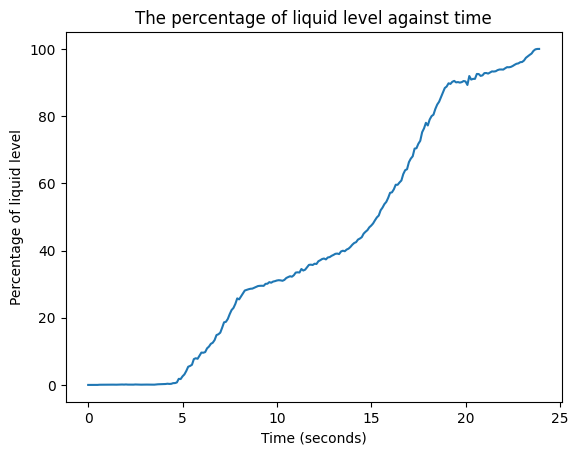

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

videoReader = cv2.VideoCapture('/content/liquidVideo.mp4')
ret, img1 = videoReader.read()

total_frames = int(videoReader.get(cv2.CAP_PROP_FRAME_COUNT))
fps = videoReader.get(cv2.CAP_PROP_FPS)

#Variables
liquid_levels = []
times = []

#Getting the first frame as the reference background
img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
total_area = img1.shape[0] * img1.shape[1]

# For loop to go through all the frames and calculate liquid level in each frame
for frame_index in range(total_frames):
    videoReader.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = videoReader.read()
    if not ret:
        break

    frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    diffImg = cv2.absdiff(img1_g, frame_g)
    ret, mask = cv2.threshold(diffImg, 30, 255, cv2.THRESH_BINARY)

    # assigning the sum of white pixels (the total area of the liquid level in the container)
    liquid_area = np.sum(mask == 255)

    # calculate the % of liquid level
    liquid_level_percent = (liquid_area / total_area) * 100
    time_sec = frame_index / fps

    # calculate the time in seconds
    liquid_levels.append(liquid_level_percent)
    times.append(time_sec)

plt.plot(times, liquid_levels)
plt.xlabel('Time (seconds)')
plt.ylabel('Percentage of liquid level')
plt.title('The percentage of liquid level against time')
plt.show()
